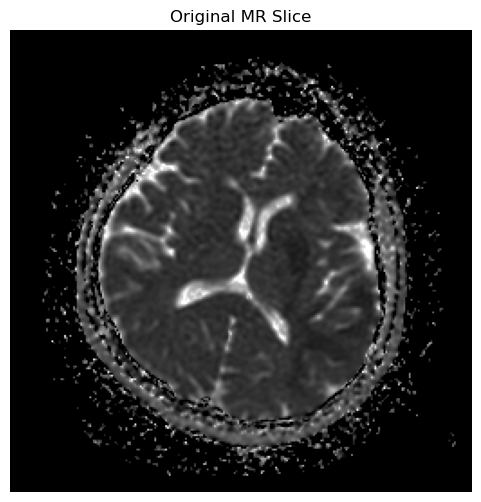

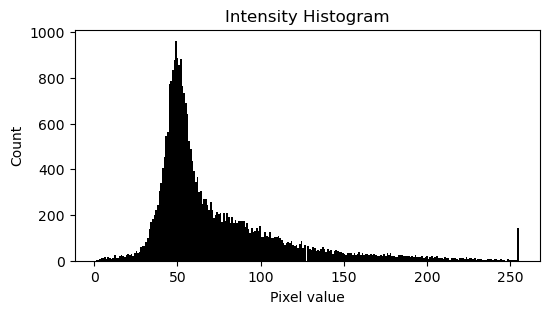

In [34]:
import cv2
import matplotlib.pyplot as plt


from pathlib import Path
path=Path("C:\\Users\\alt_user\\Desktop\\Teknofest25Veri\\Pipeline\\val_results\\F\\Vaka_359786_50451936.2.4_Subakut.png")
# Load as grayscale
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


def show_image_and_histogram(img):
    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap="gray")
    plt.title("Original MR Slice")
    plt.axis("off")

    # Plot histogram
    plt.figure(figsize=(6, 3))
    plt.hist(img.ravel()[img.ravel()!=0], bins=256, color="black")
    plt.title("Intensity Histogram")
    plt.xlabel("Pixel value")
    plt.ylabel("Count")
    plt.show()


show_image_and_histogram(img)

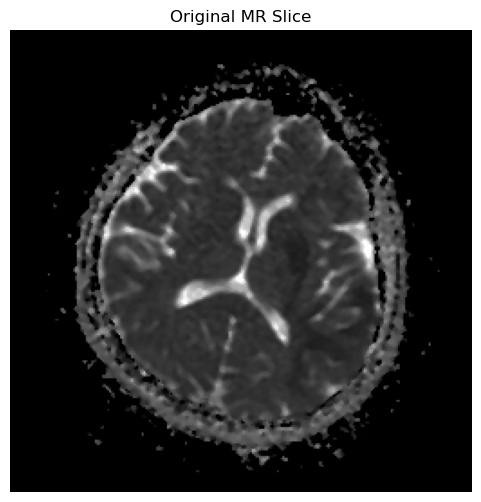

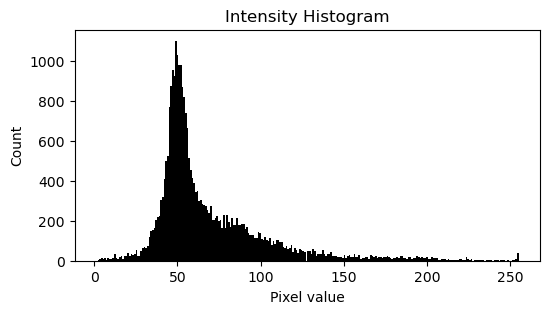

In [35]:
denoised = cv2.medianBlur(img, ksize=3) 
show_image_and_histogram(denoised)

In [69]:
IMAGE_EXTENSIONS = {'.png'}

def read_images(root_dir):
    root = Path(root_dir)
    for path in root.rglob('*'):
        if path.suffix.lower() in IMAGE_EXTENSIONS:
            yield path

In [72]:
import os

for image_path in read_images("noise"):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    denoised = cv2.medianBlur(img, ksize=5)
    label=image_path.stem.split('_')[-1]  # Assuming label is the first part of the filename
    denoised_path = os.path.join(f"denoised/{label}", f"{image_path.name}")
    os.makedirs(os.path.dirname(denoised_path), exist_ok=True)
    cv2.imwrite(str(denoised_path), denoised)
    print(f"Denoised image saved at: {denoised_path}")

Denoised image saved at: denoised/HiperakutAkut\aug.1.Vaka_356786_50226994.3.4_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.1.Vaka_357997_50464072.0.11_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.1.Vaka_364070_50059319.3.16_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.1.Vaka_387129_50480598.3.24_HiperakutAkut.png
Denoised image saved at: denoised/NormalKronik\aug.1.Vaka_394828_50057670.2.6_NormalKronik.png
Denoised image saved at: denoised/HiperakutAkut\aug.2.Vaka_330369_50255429.2.3_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.2.Vaka_356786_50226994.3.4_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.2.Vaka_364070_50059319.3.16_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.2.Vaka_387129_50480598.3.24_HiperakutAkut.png
Denoised image saved at: denoised/HiperakutAkut\aug.3.Vaka_330369_50255429.2.3_HiperakutAkut.png
Denoised image saved at: de